In [1]:
import os
import re
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'Times New Roman'

from imgprocesslib import *

In [2]:
# Merged Catologue
data_cat = pd.read_csv(os.path.join(homedir, 'Output/', 'Matched_Catalogue.txt'), delim_whitespace=True)
data_mod_cat = pd.read_csv(os.path.join(homedir, 'Output/', 'Matched_MODIFIED_Catalogue.txt'), delim_whitespace=True)

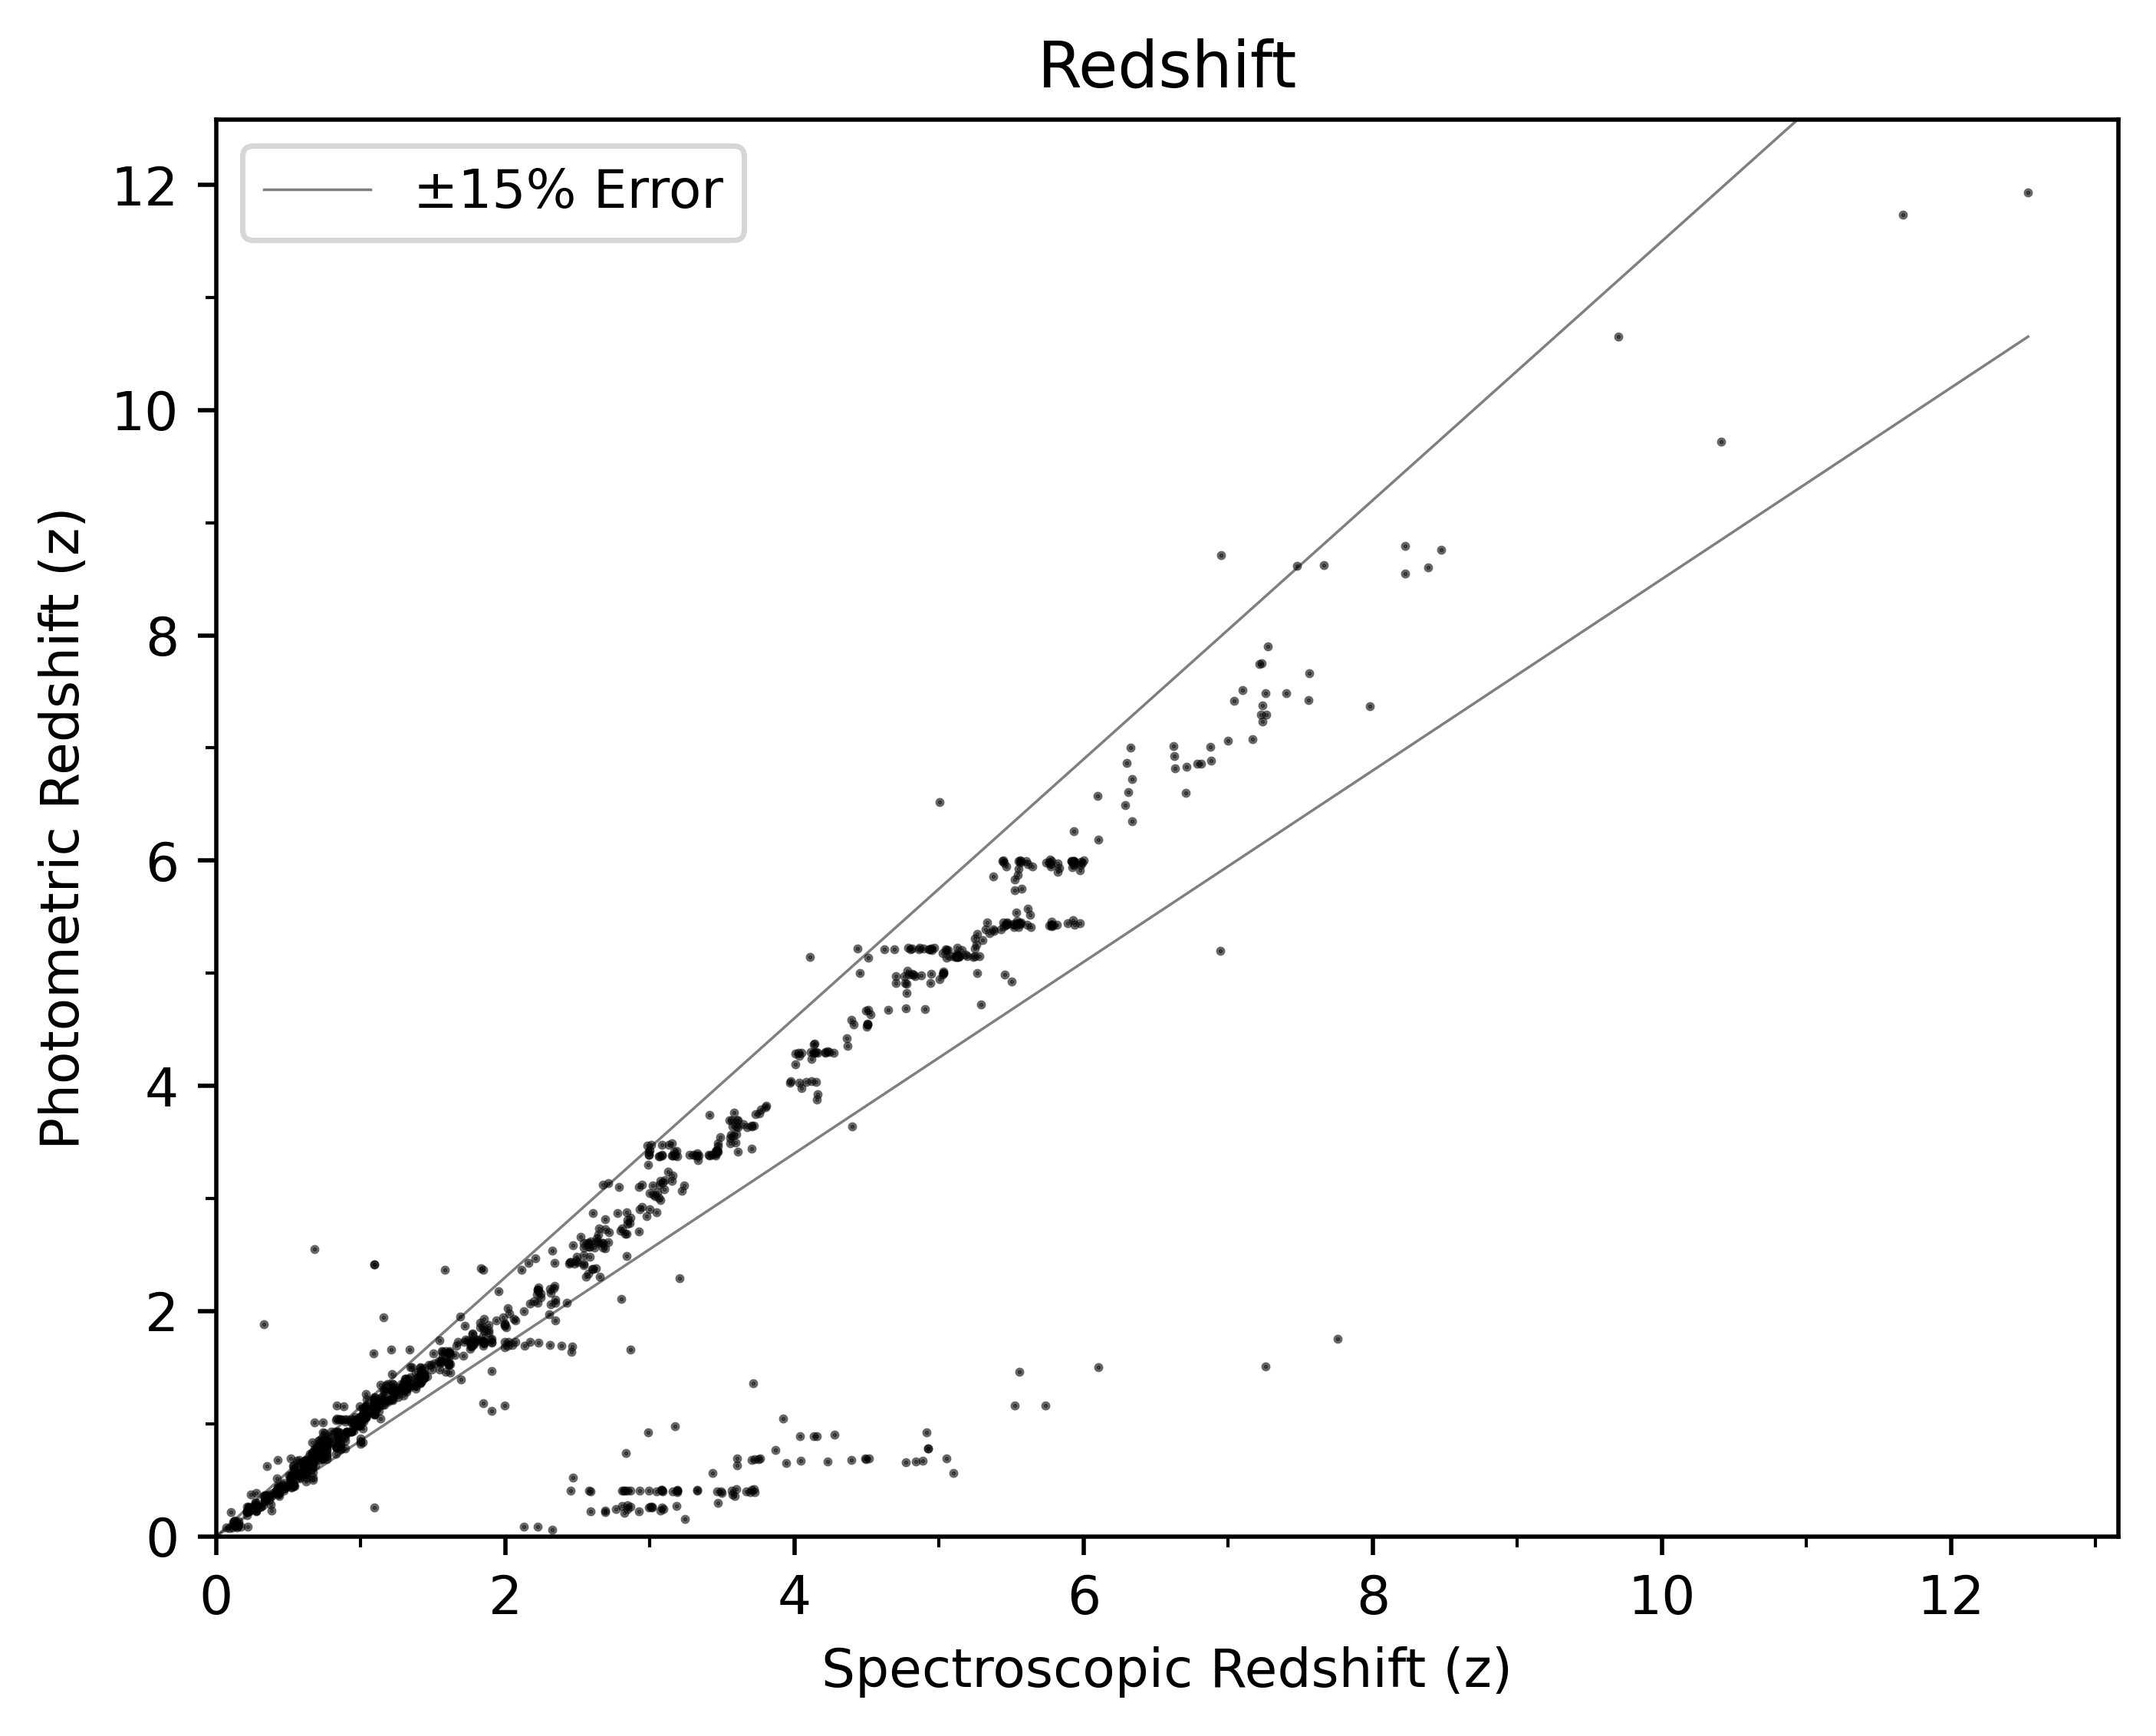

In [3]:
plt.figure(dpi=500)
#plt.scatter(data_cat['z_spec'], data_cat['z_phot'], s=0.5, color='black', alpha=0.6)
plt.scatter(data_mod_cat['z_spec'], data_mod_cat['z_phot'], s=0.5, color='black', alpha=0.6)
plt.plot([], [], label='±15% Error', color='black', linewidth=0.5, alpha=0.5)

plt.xlabel('Spectroscopic Redshift (z)')
plt.ylabel('Photometric Redshift (z)')
plt.title('Redshift')
plt.ylim(0, )
xlim = plt.xlim(0, )
x_line_u = np.linspace(0, max(data_cat['z_spec']), 2)
x_line_d = np.linspace(0, max(data_cat['z_spec']), 2)
m_u = 1.15 * x_line_u
m_d = 0.85 * x_line_d
plt.plot(x_line_u, m_u, 'black', linewidth=0.5, alpha=0.5)
plt.plot(x_line_d, m_d, 'black', linewidth=0.5, alpha=0.5)

plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(mtick.AutoMinorLocator(2))

plt.legend()
plt.show()

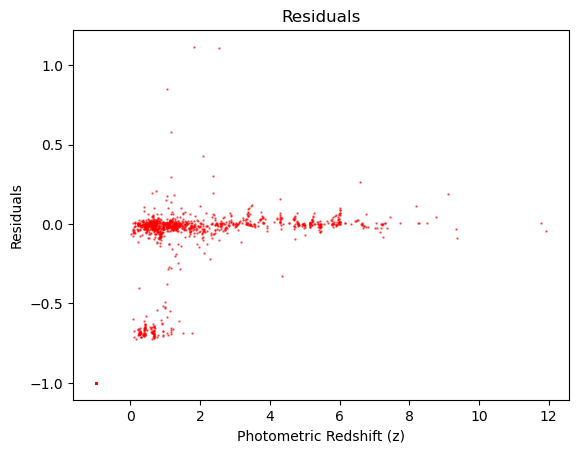

In [4]:
plt.scatter(data_cat['z_phot'], (data_cat['z_phot']-data_cat['z_spec'])/(1+data_cat['z_spec']), s=0.5, color='red', alpha=0.6)
plt.xlabel('Photometric Redshift (z)')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.xlim()
plt.show()


In [5]:
filters_list  = [{'Telescope': 'NIRCam Short Wavelength',
                  'filters': ['090w', '115w', '150w', '182m', '200w', '210m'],
                  'colours': ['#B7AAEE', '#AF47FF', '#5C55B3', '#99CCFF', '#00A8E0', '#0101DF']},
                 {'Telescope': 'NIRCam Long Wavelength',
                  'filters': ['277w', '335m', '356w', '410m', '430m', '444w', '460m', '480m'],
                  'colours': ['#256E37', '#B58653', '#A84900', '#0B412B', '#51C083', '#C8D96F', '#89931E', '#6DB41D']},
                 {'Telescope': 'HST ACS', 
                  'filters': ['435w', '606w', '775w', '814w', '850lp'],
                  'colours': ['#660000', '#DD0000', '#DB2E6B', 'orange', '#E0D100']},
                ]

In [6]:
for file in os.listdir(os.path.join(homedir, "Filter_files")):
    if file.endswith('.dat'):
        print(file)

HST_ACS_WFC.F775W.dat
JWST_NIRCam.F335M.dat
JWST_NIRCam.F410M.dat
JWST_NIRCam.F356W.dat
JWST_NIRCam.F150W.dat
JWST_NIRCam.F210M.dat
JWST_NIRCam.F480M.dat
JWST_NIRCam.F200W.dat
JWST_NIRCam.F430M.dat
JWST_NIRCam.F115W.dat
HST_ACS_WFC.F814W.dat
JWST_NIRCam.F444W.dat
HST_ACS_WFC.F850LP.dat
JWST_NIRCam.F182M.dat
JWST_NIRCam.F277W.dat
HST_ACS_WFC.F435W.dat
HST_ACS_WFC.F606W.dat
JWST_NIRCam.F460M.dat
JWST_NIRCam.F090W.dat


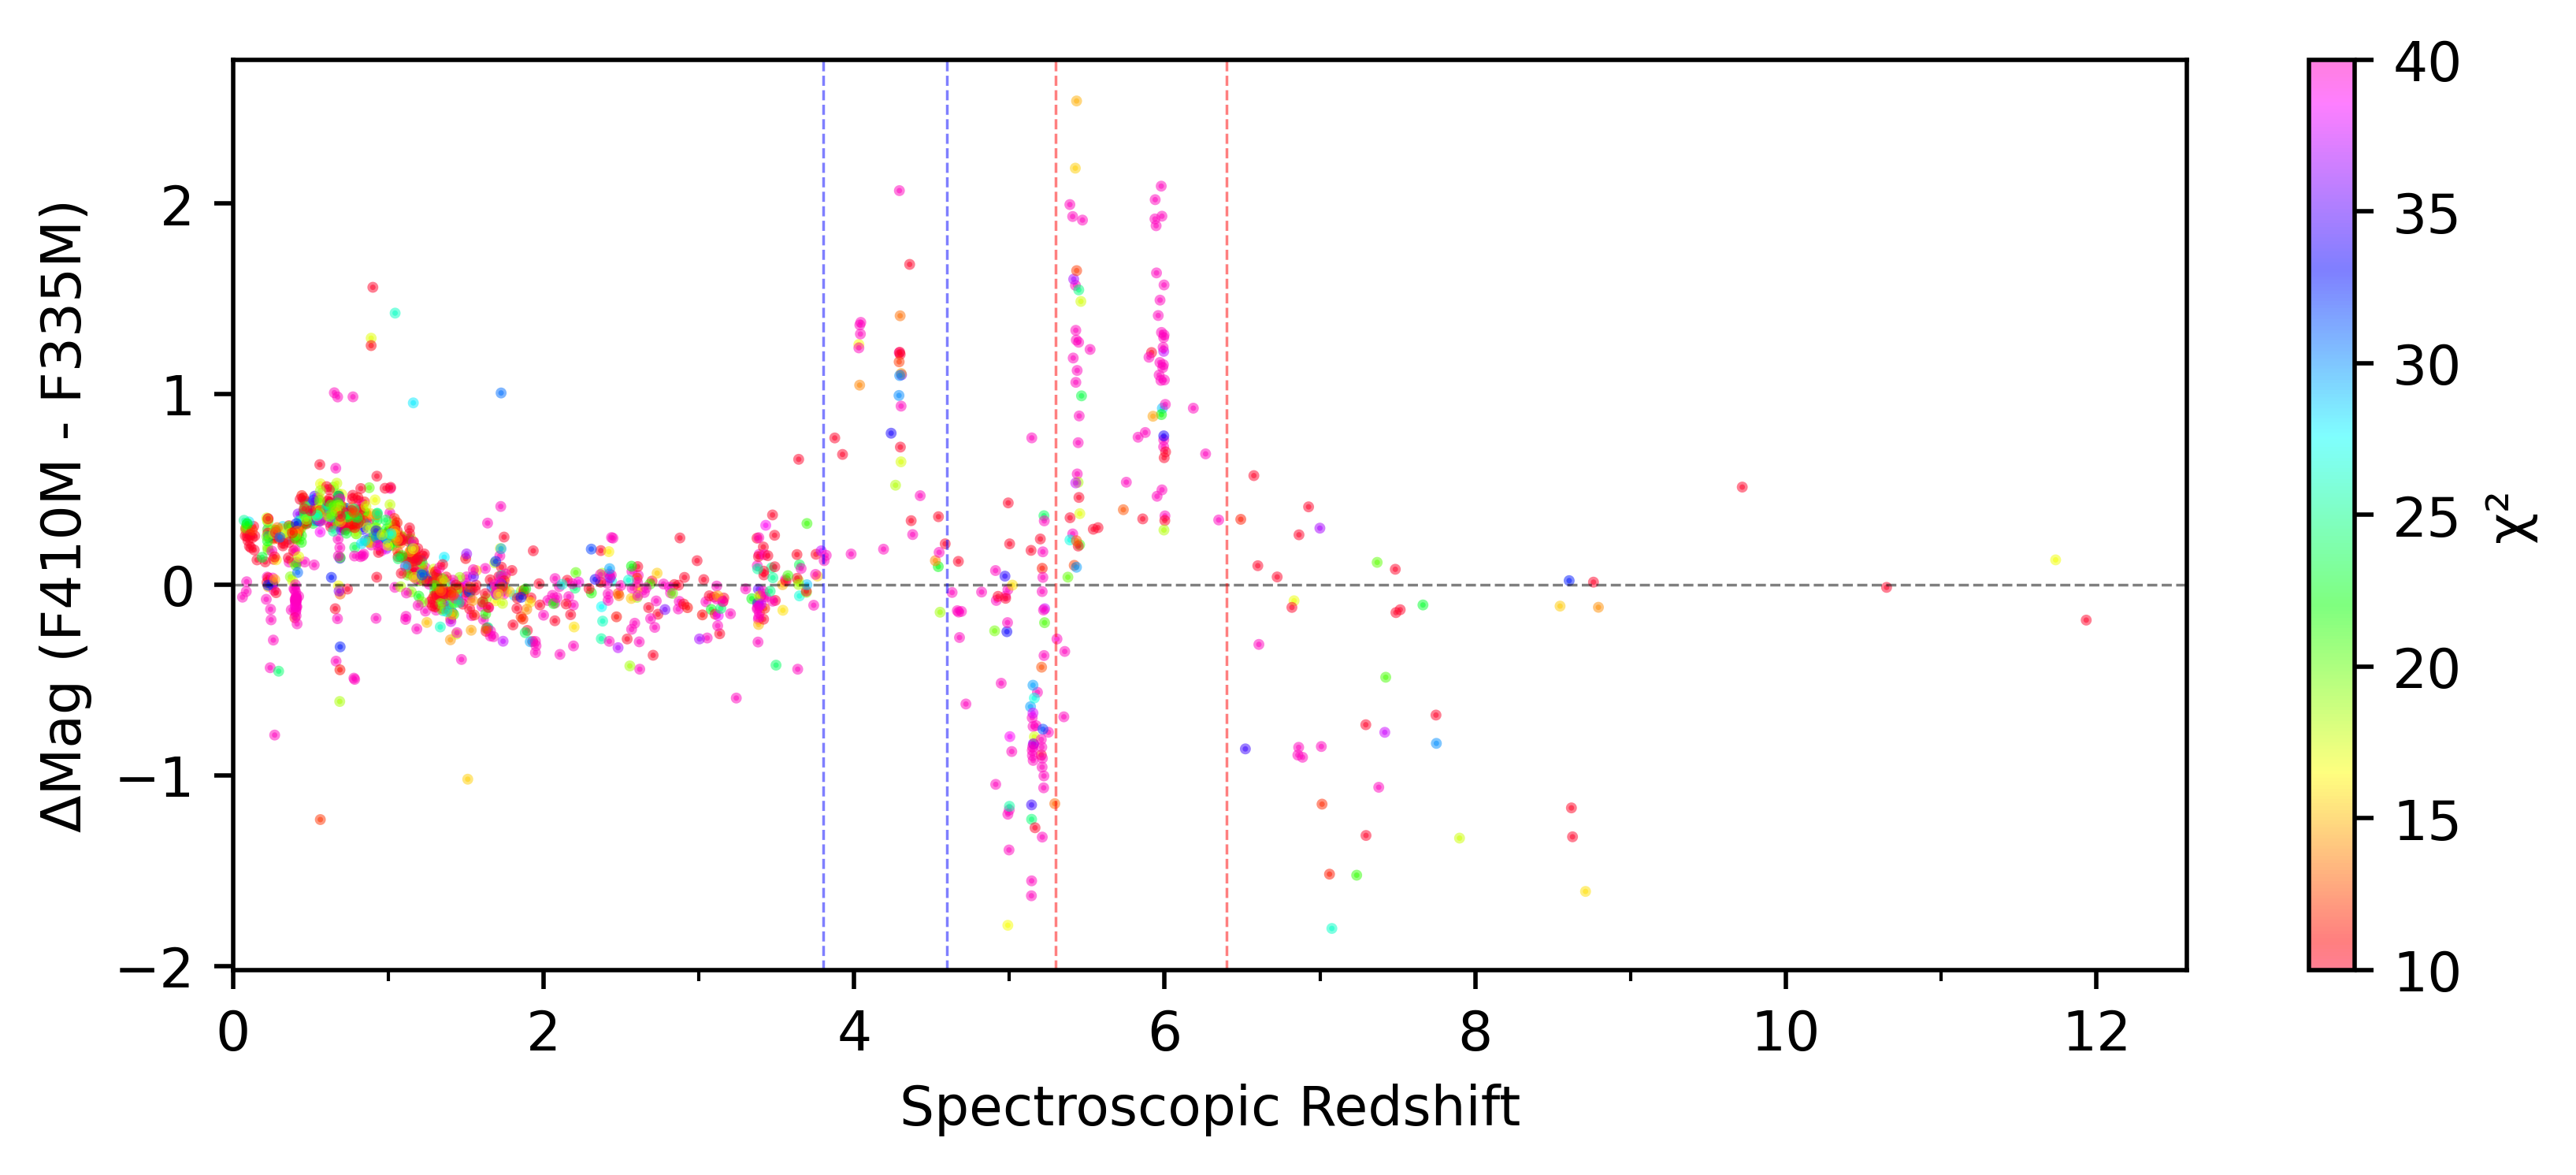

In [7]:
plt.figure(dpi=500, figsize=(8, 3))

#scatter = plt.scatter(data_cat['z_phot'], data_cat['mag_f410m'] - data_cat['mag_f335m'], s=1, c=data_cat['chi2_best'], cmap='gist_rainbow', alpha=0.5)
#plt.errorbar(data_cat['z_phot'], data_cat['mag_f410m'] - data_cat['mag_f335m'], xerr=data_cat['z_phot_err'], yerr=data_cat['mag_f410m_err'] - data_cat['mag_f335m_err'], fmt='none', ecolor='black', alpha=0.1, elinewidth=0.5, capsize=0.5)
scatter_mod = plt.scatter(data_mod_cat['z_phot'], data_mod_cat['mag_f410m'] - data_mod_cat['mag_f335m'], s=1, c=data_mod_cat['chi2_best'], cmap='gist_rainbow', alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axvline(x=3.8, color='blue', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axvline(x=4.6, color='blue', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axvline(x=5.3, color='red', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axvline(x=6.4, color='red', linestyle='--', linewidth=0.5, alpha=0.5)

plt.xlabel('Spectroscopic Redshift')
plt.ylabel('ΔMag (F410M - F335M)')

plt.xlim(0, )
# Format of the x-axis should be intergers
#plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:g}'.format(x)))
#plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(2))

# cbar = plt.colorbar(scatter)
# cbar.set_label('Chi²')
# cbar.set_alpha(0.7)
# scatter.set_clim(10, 40)

cbar_mod = plt.colorbar(scatter_mod)
cbar_mod.set_label('χ²')
cbar_mod.set_alpha(0.7)
scatter_mod.set_clim(10, 40)

plt.show()

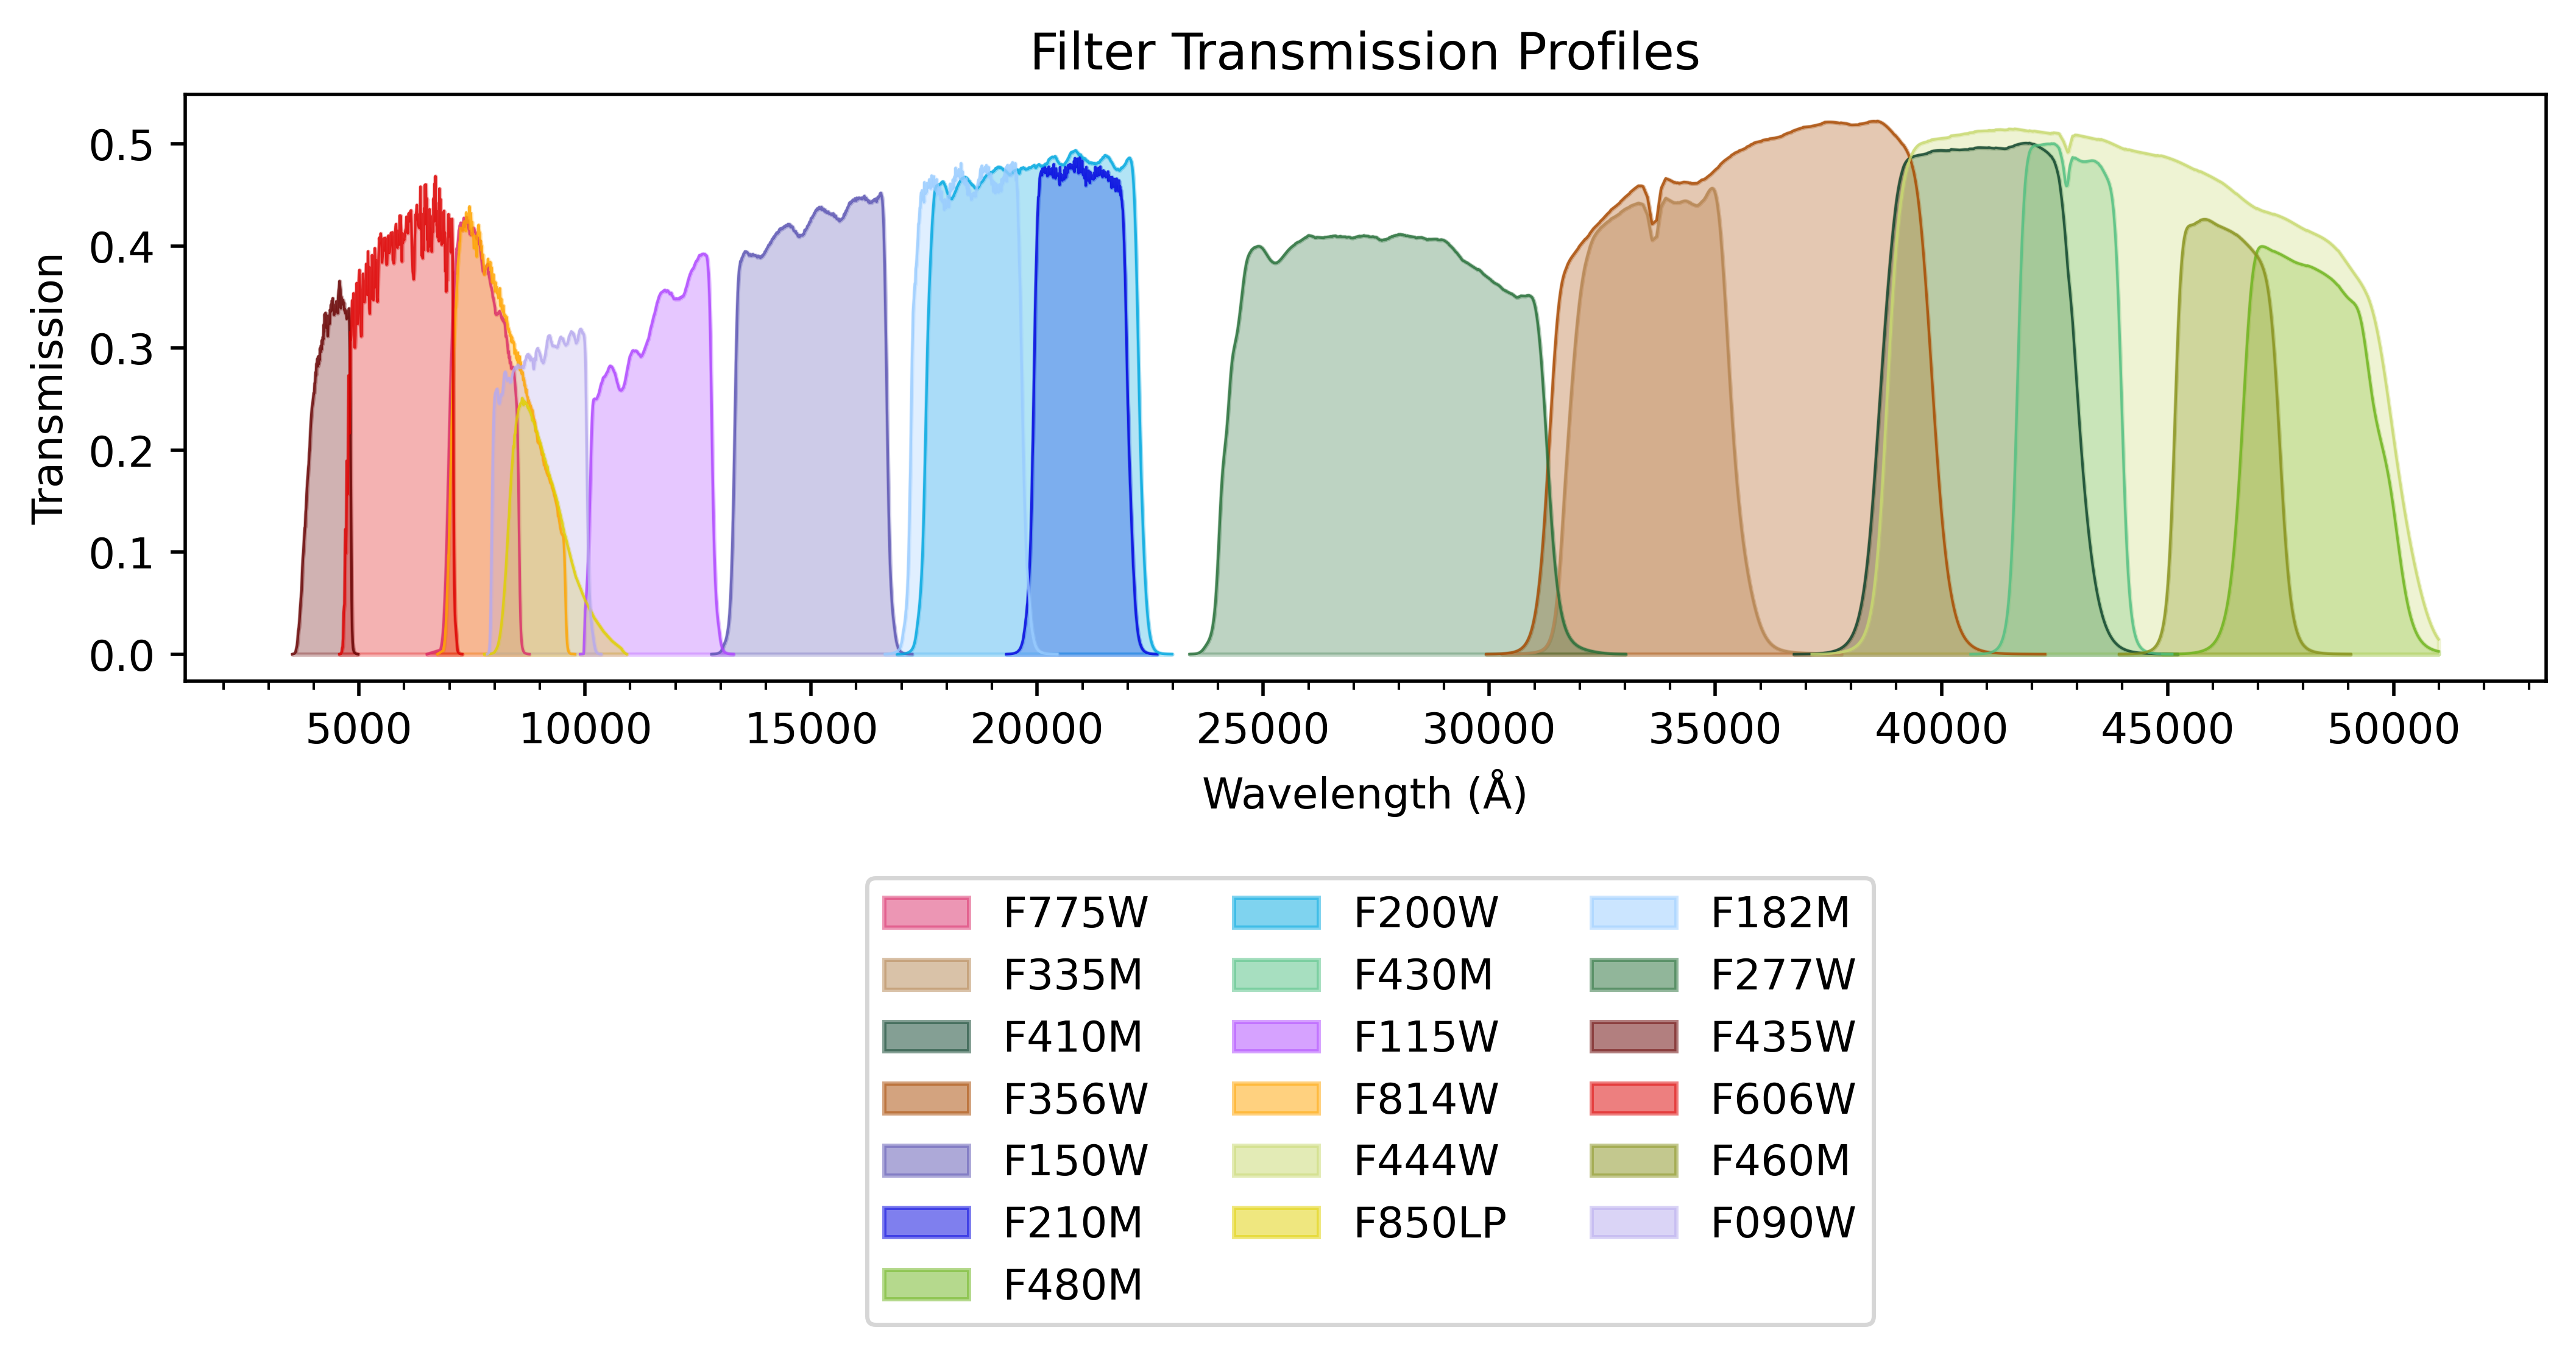

In [9]:
plt.figure(dpi=500, figsize=(10, 2.5))

for file in os.listdir(os.path.join(homedir, "Filter_files")):
    if file.endswith('.dat'):
        for t in filters_list:
            for fil in t['filters']:
                if fil.upper() in file.split('.')[1]:
                    data = pd.read_csv(os.path.join(homedir, "Filter_files", file), delim_whitespace=True, header=None, names=['Wavelength', 'Transmission'])
                    plt.plot(data['Wavelength'], data['Transmission'], color=t['colours'][t['filters'].index(fil)], alpha=0.8, linewidth=0.6)
                    plt.fill_between(data['Wavelength'], data['Transmission'], label=f'F{fil.upper()}', color=t['colours'][t['filters'].index(fil)], alpha=0.3) 

plt.xlabel('Wavelength (Å)')
plt.ylabel('Transmission')
plt.title('Filter Transmission Profiles')
leg = plt.legend(ncol=3, bbox_to_anchor=(0.28, -0.3), loc='upper left')
for lh in leg.legend_handles:
    lh.set_alpha(0.5)

plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(5000))
plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
plt.show()

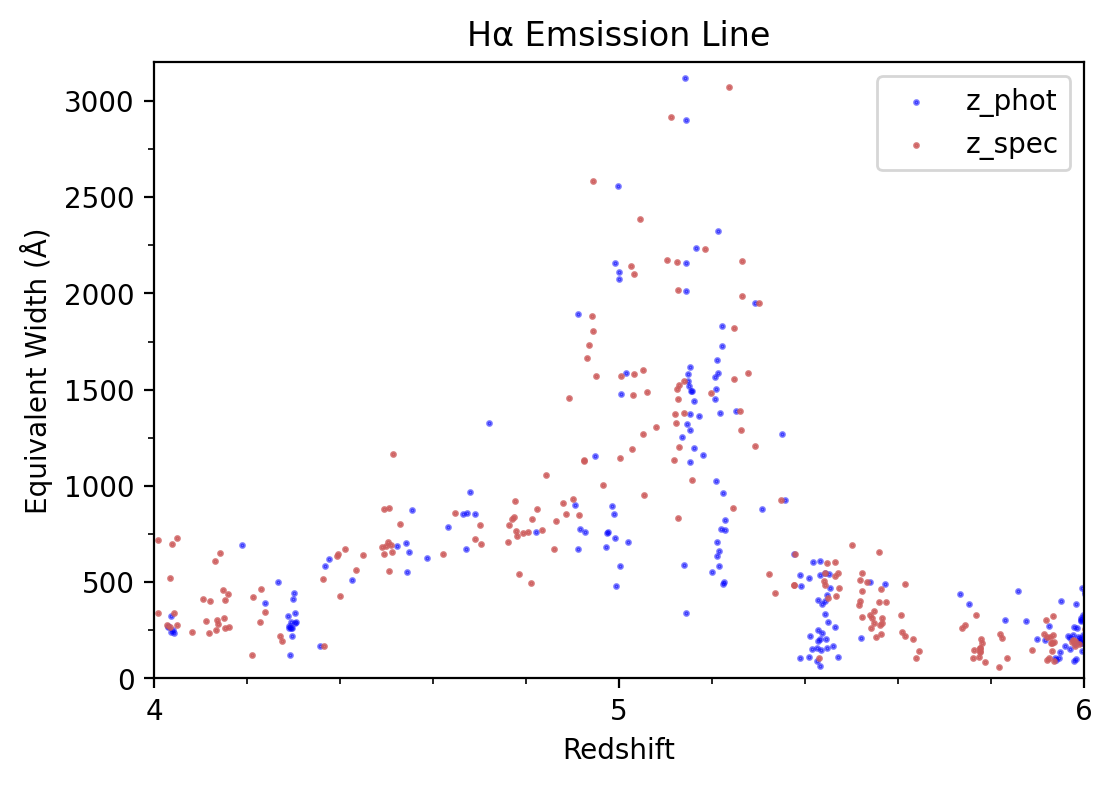

In [17]:
dat = data_mod_cat
# dat['f410m']-dat['f335m']
# (41000-33500)*np.power(10., -10)
# 410 - 4262.86
# 335 - 3389.42
EWs_phot = ((4262.86)*(10**(-0.4*(dat['mag_f410m']-dat['mag_f335m']))))/(1+dat['z_phot'])
EWs_spec = ((4262.86)*(10**(-0.4*(dat['mag_f410m']-dat['mag_f335m']))))/(1+dat['z_spec'])

plt.figure(dpi=200, figsize=(6, 4))
plt.scatter(dat['z_phot'], EWs_phot, alpha=0.5, s=2, label='z_phot', color='blue') # c=dat['chi2_best'], cmap='gist_rainbow'
plt.scatter(dat['z_spec'], EWs_spec, alpha=0.8, s=2, label='z_spec', color='indianred')
plt.xlabel('Redshift')
plt.ylabel('Equivalent Width (Å)')
plt.xlim(4, 6)
plt.ylim(0, 3200)

# cbar = plt.colorbar()
# cbar.set_label('χ²')
# cbar.set_alpha(0.7)
# scat.set_clim(10, 40)
plt.title('Hα Emsission Line')

plt.legend()
plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(mtick.AutoMinorLocator(2))

plt.show()

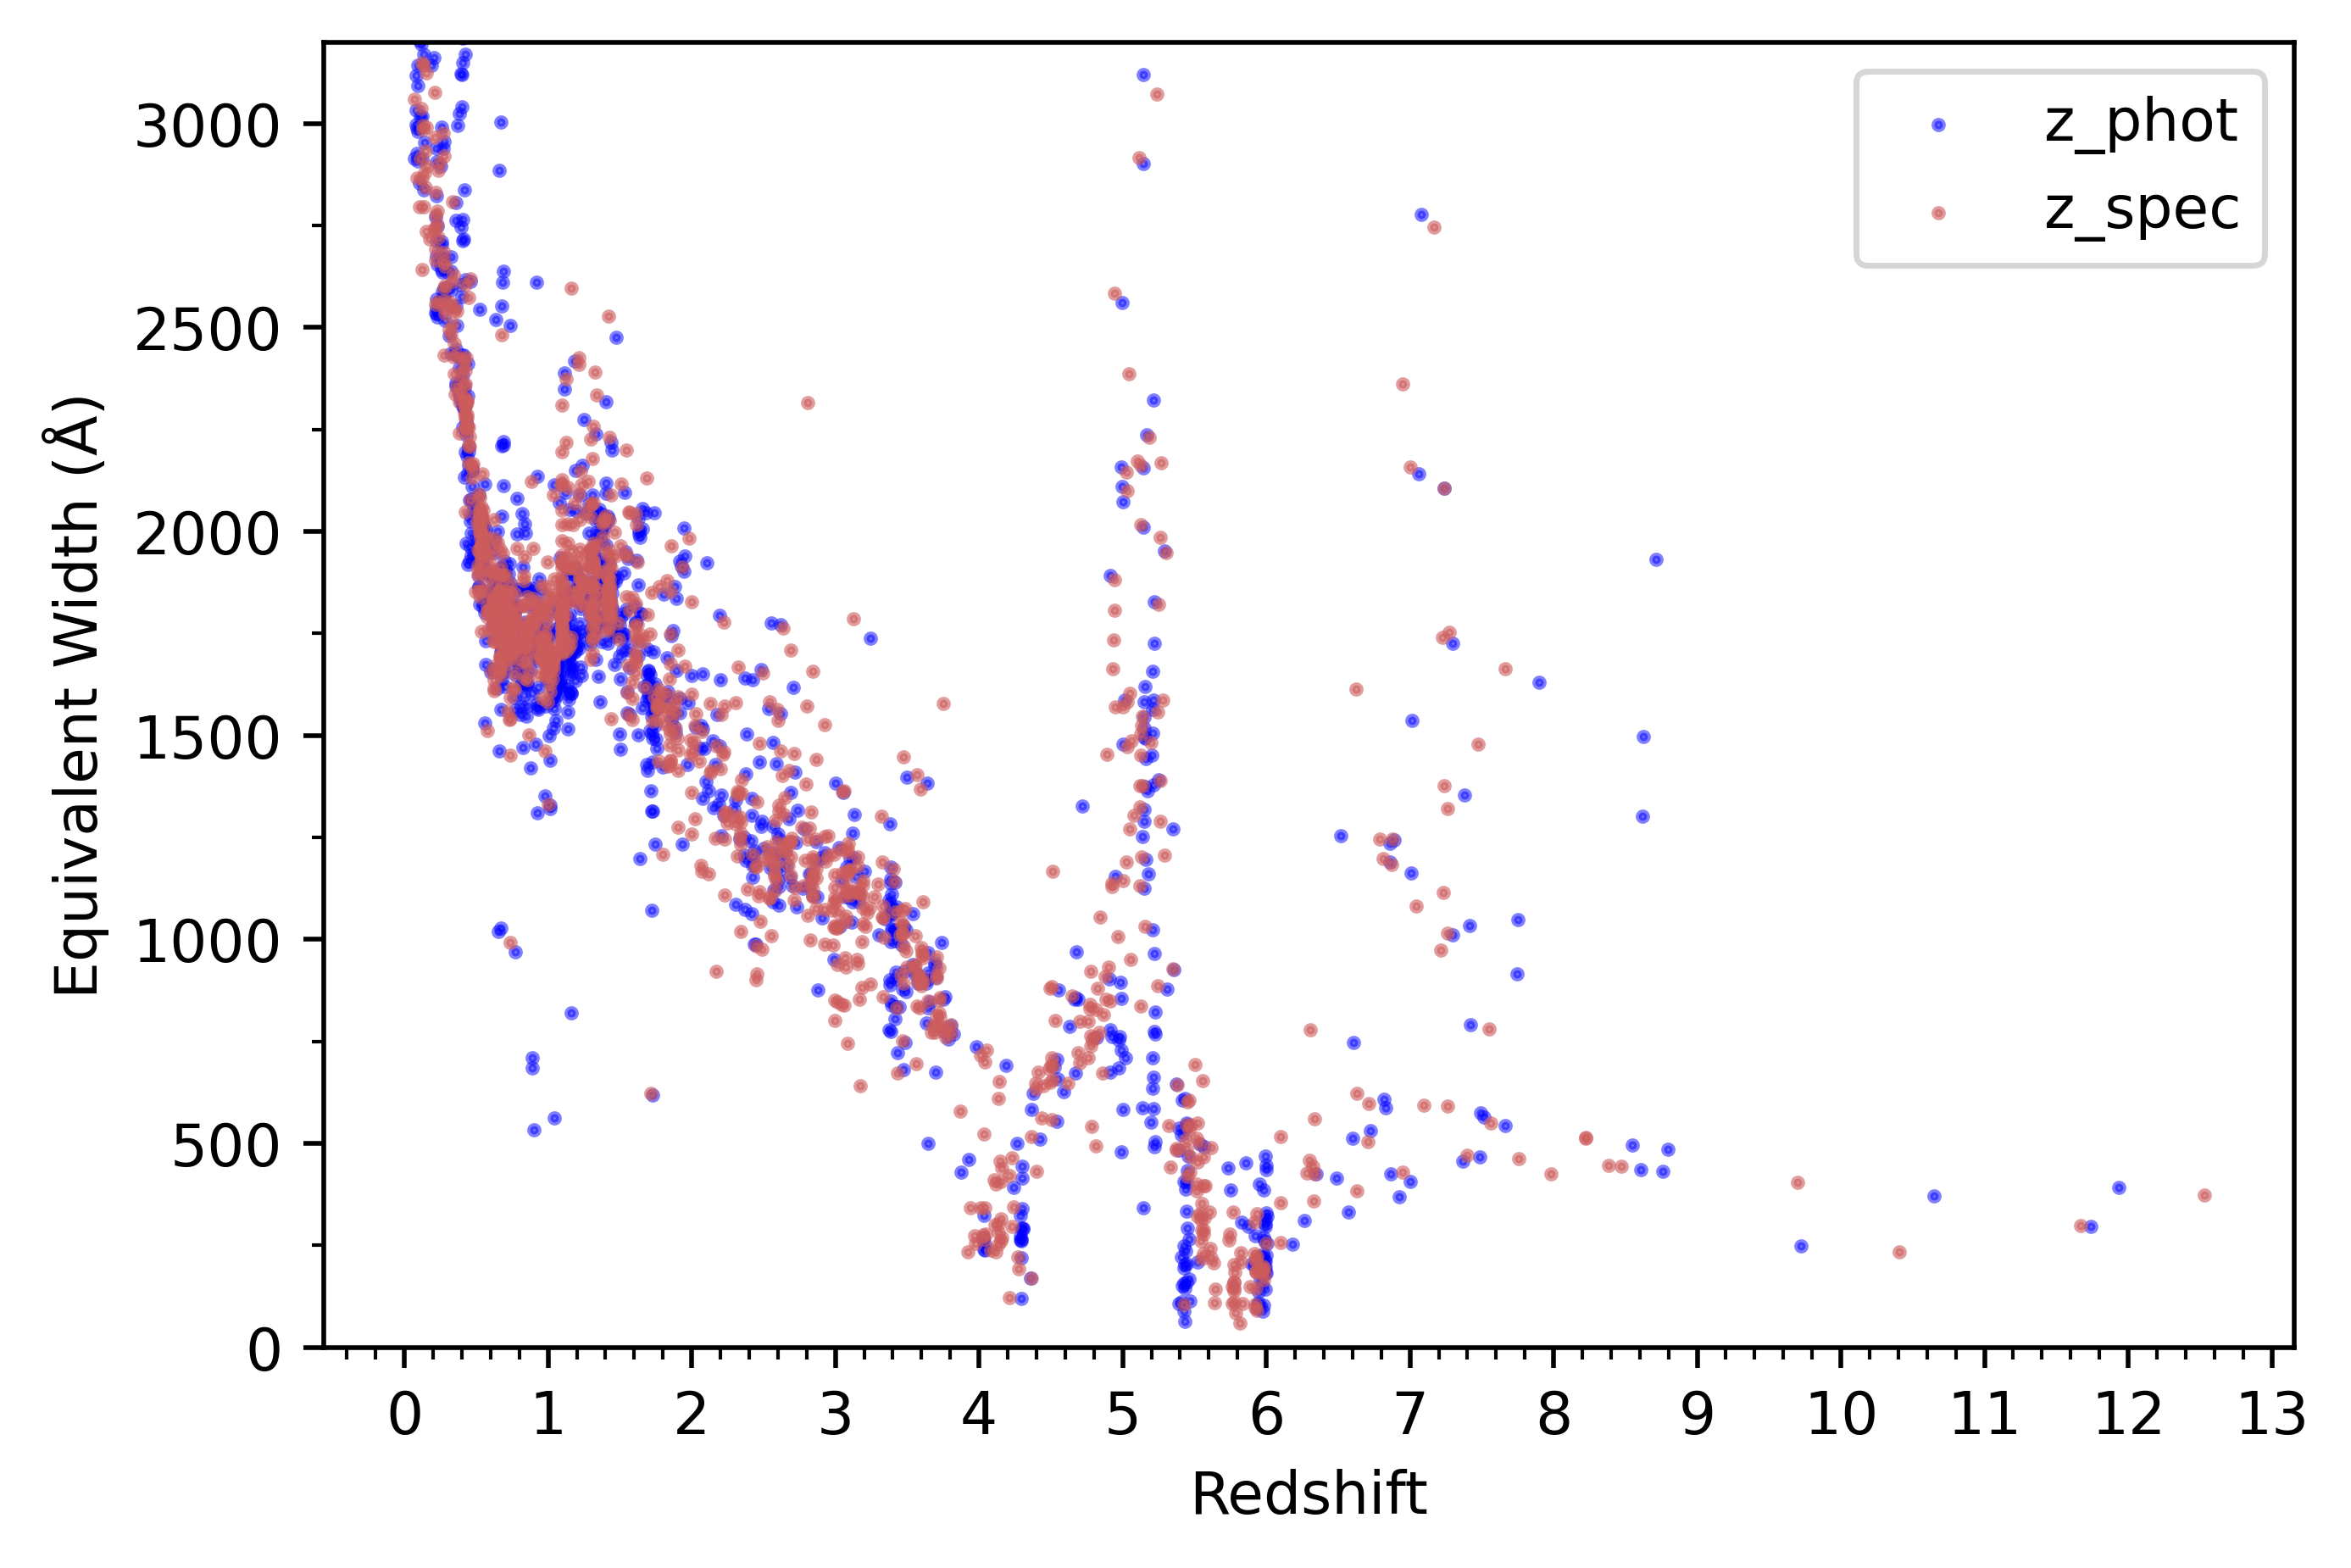

In [21]:
dat = data_mod_cat
# dat['f410m']-dat['f335m']
# (41000-33500)*np.power(10., -10)
# 410 - 4262.86
# 335 - 3389.42
EWs_phot = ((4262.86)*(10**(-0.4*(dat['mag_f410m']-dat['mag_f335m']))))/(1+dat['z_phot'])
EWs_spec = ((4262.86)*(10**(-0.4*(dat['mag_f410m']-dat['mag_f335m']))))/(1+dat['z_spec'])

plt.figure(dpi=500, figsize=(6, 4))
plt.scatter(dat['z_phot'], EWs_phot, alpha=0.5, s=2, label='z_phot', color='blue') # c=dat['chi2_best'], cmap='gist_rainbow'
plt.scatter(dat['z_spec'], EWs_spec, alpha=0.6, s=2, label='z_spec', color='indianred')
plt.xlabel('Redshift')
plt.ylabel('Equivalent Width (Å)')
plt.xlim()
plt.ylim(0, 3200)

# cbar = plt.colorbar()
# cbar.set_label('χ²')
# cbar.set_alpha(0.7)
# scat.set_clim(10, 40)
#plt.title('Hα Emsission Line')

plt.legend()
plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(mtick.AutoMinorLocator(2))

plt.show()

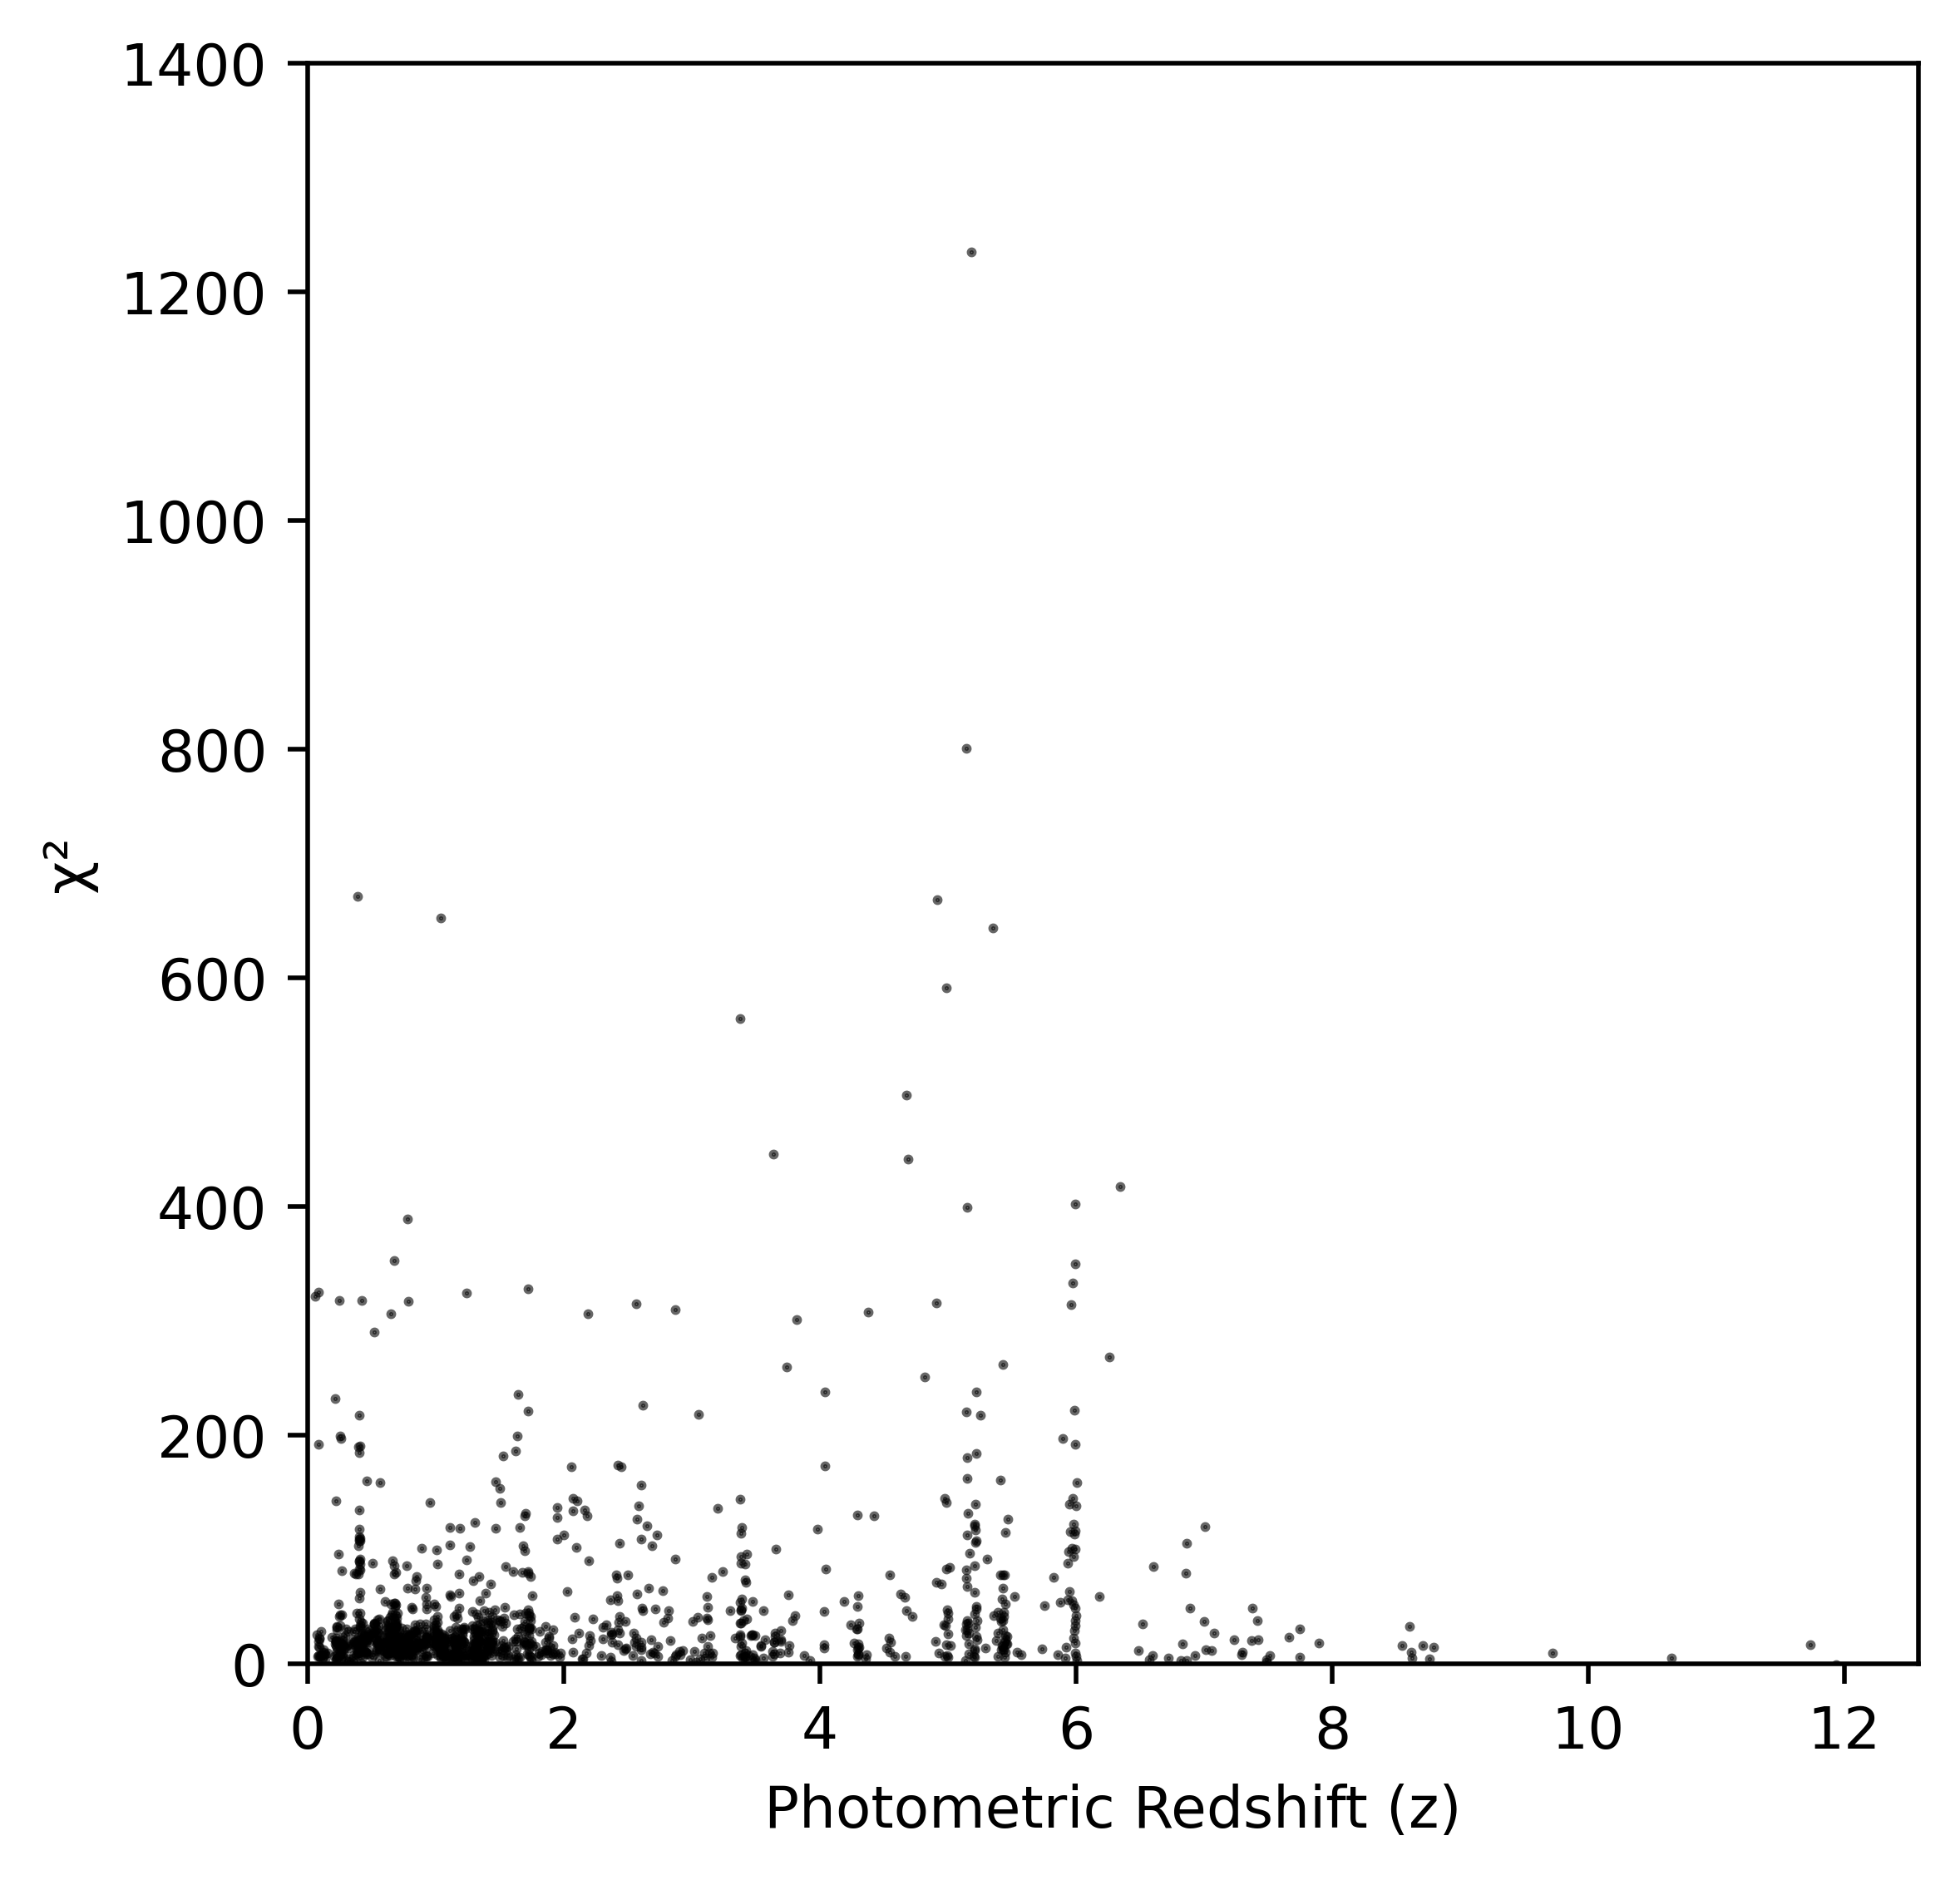

In [10]:
plt.figure(dpi=500, figsize=(5, 5))
#plt.scatter(data_cat['z_phot'], data_cat['chi2_best'], s=0.5, color='black', alpha=0.6)
plt.scatter(data_mod_cat['z_phot'], data_mod_cat['chi2_best'], s=0.5, color='black', alpha=0.6)
plt.xlabel('Photometric Redshift (z)')
plt.ylabel('χ²')

plt.xlim(0, )
plt.ylim(0, 1400)
plt.show()

In [11]:
data_mod_cat.iloc[0, 11:24]

f090w     0.006618
f115w      0.01299
f150w     0.014152
f200w     0.011931
f277w      0.01534
f335m     0.043944
f356w     0.029038
f410m      0.01111
f435w    -0.000663
f606w     0.001169
f775w     0.007594
f814w     0.002149
f850lp    0.010392
Name: 0, dtype: object

In [12]:
data_mod_cat.iloc[0, 24:37]

f090w_err     0.000934
f115w_err     0.000767
f150w_err     0.000798
f200w_err     0.000783
f277w_err     0.000588
f335m_err     0.001012
f356w_err     0.000665
f410m_err     0.000972
f435w_err     0.002101
f606w_err     0.001529
f775w_err      0.00252
f814w_err     0.001909
f850lp_err    0.003567
Name: 0, dtype: object

In [13]:
data_mod_cat.iloc[i, 2]

5.77547

In [14]:
Fil_vals = []
for thing in data_mod_cat.columns[11:24]:
    Fil_vals.append(float(re.sub('[^0-9]', '', thing))*100)

Fil_vals = np.array(Fil_vals)

array([ 0.00661841,  0.0129903 ,  0.01415151,  0.01193125,  0.01533961,
        0.04394367,  0.02903847,  0.01110972, -0.00066276,  0.00116876,
        0.00759392,  0.00214894,  0.01039188])

5.77547


/tmp/ipykernel_1428694/462388395.py:7: RuntimeWarning: invalid value encountered in log
  mag = (-2.5*np.log(data_mod_cat.iloc[i, 11:24].values.astype(float)))+23.9


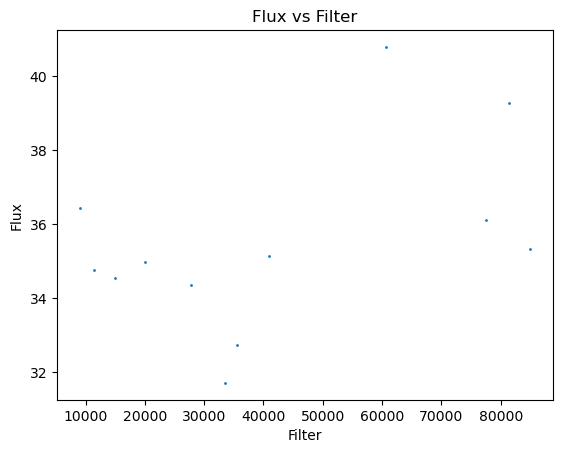

5.2924


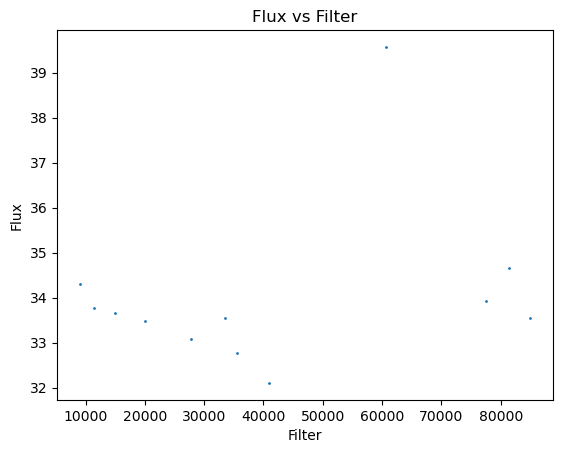

5.51526


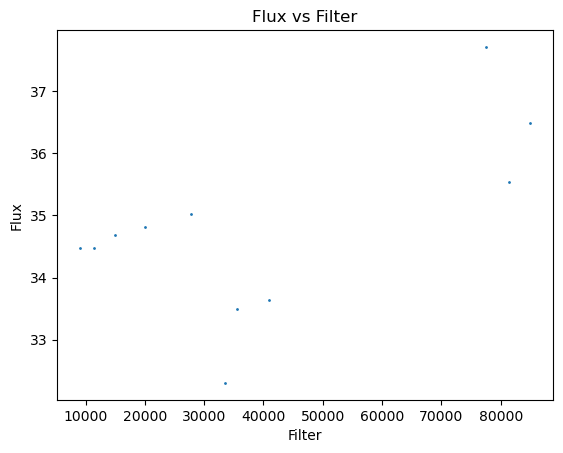

5.7628


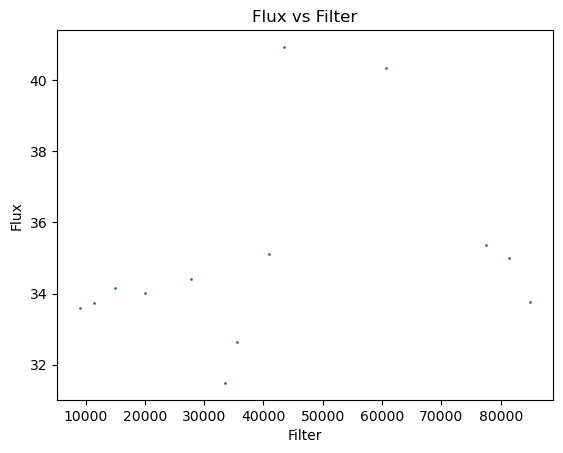

5.11217


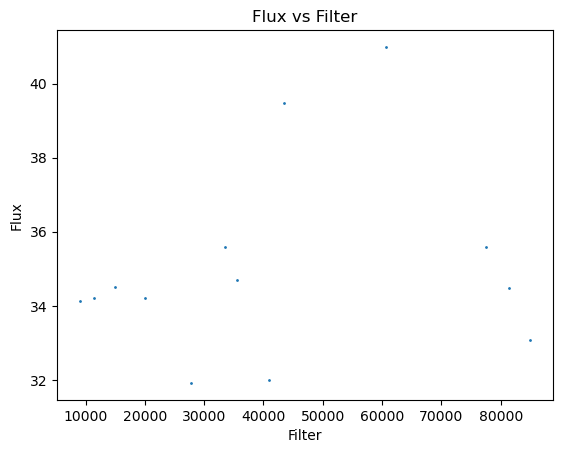

5.64429


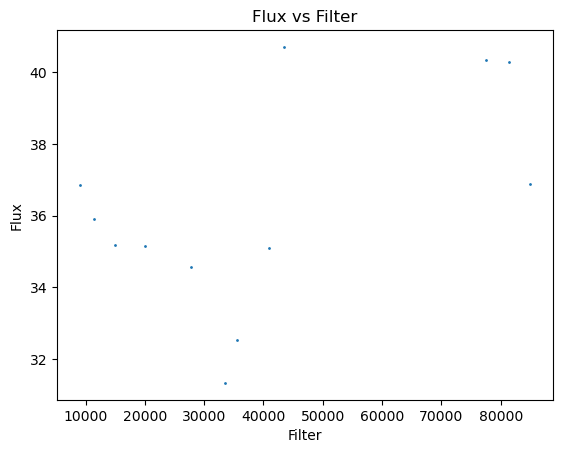

4.5037


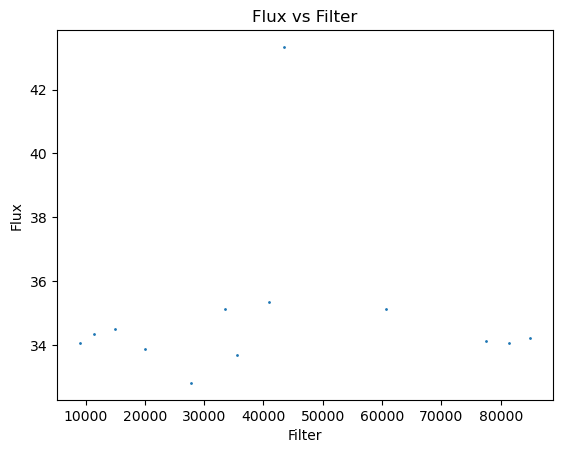

7.66405


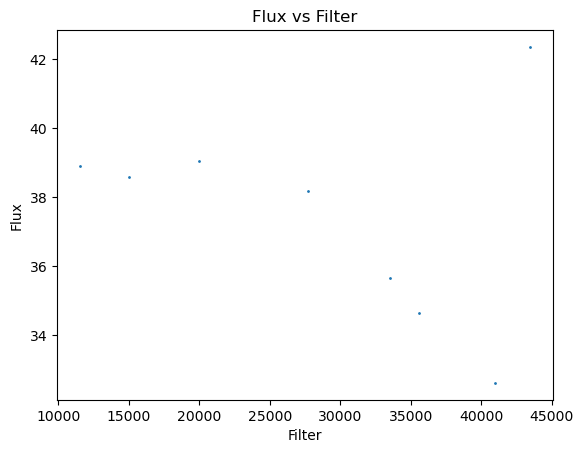

4.834


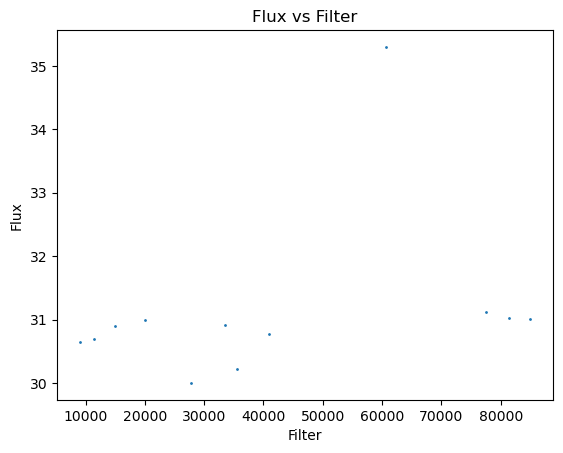

4.4955


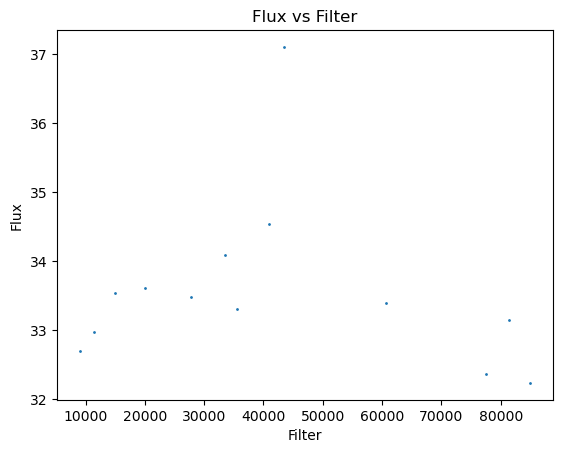

5.0311


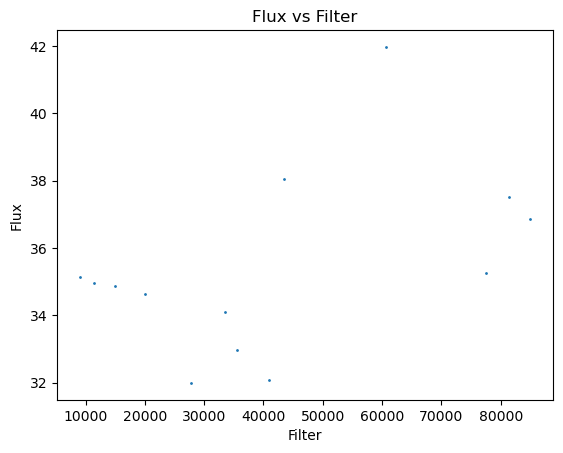

4.0279


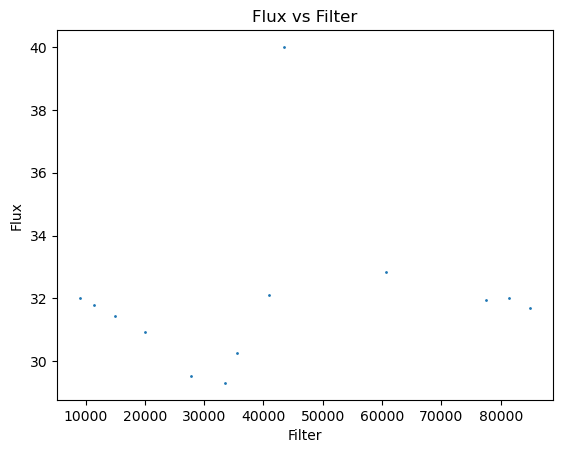

5.51767


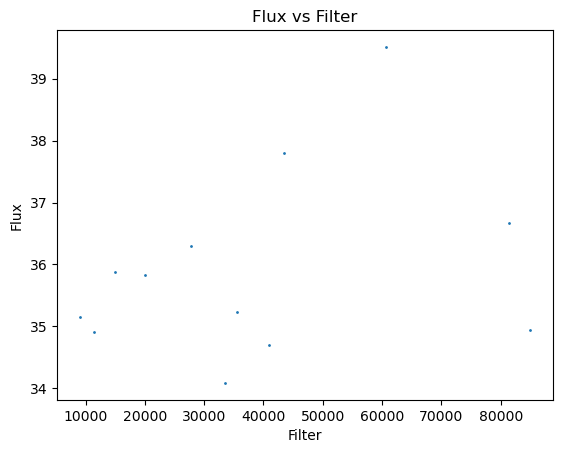

4.96592


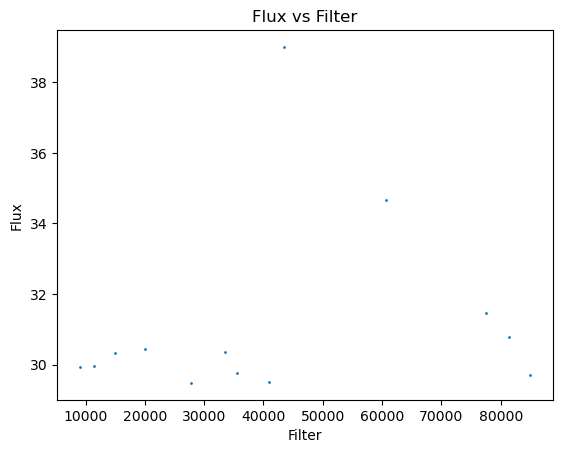

8.22507


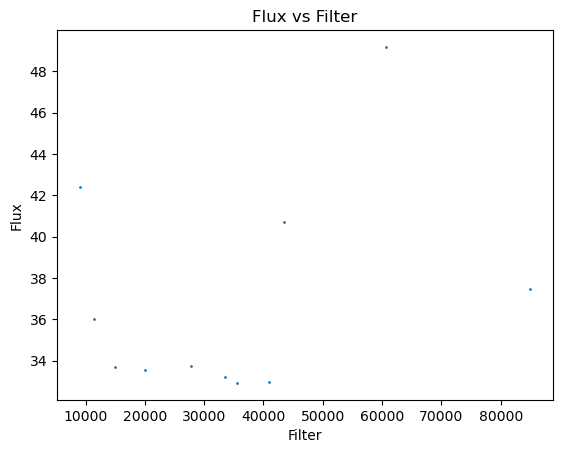

8.22116


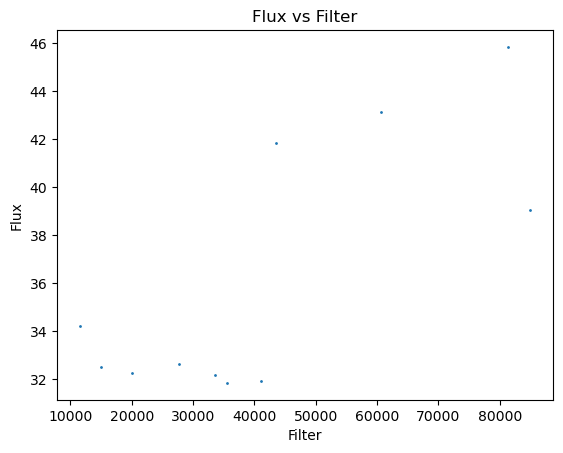

5.60541


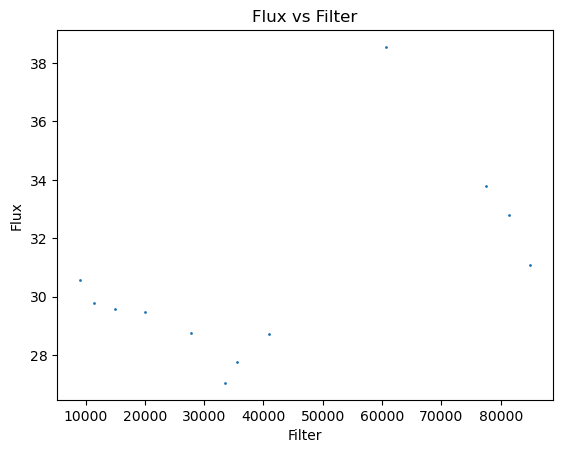

5.1021


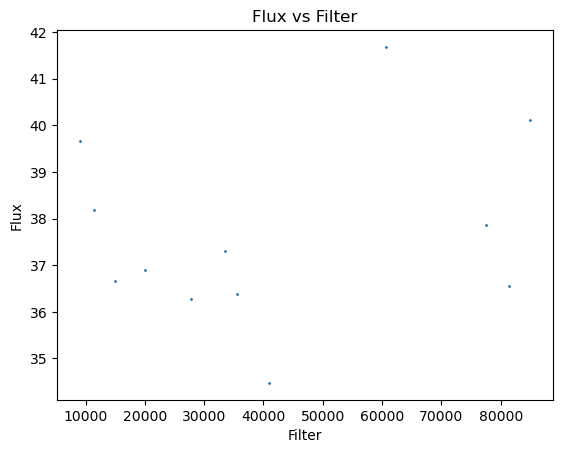

4.763


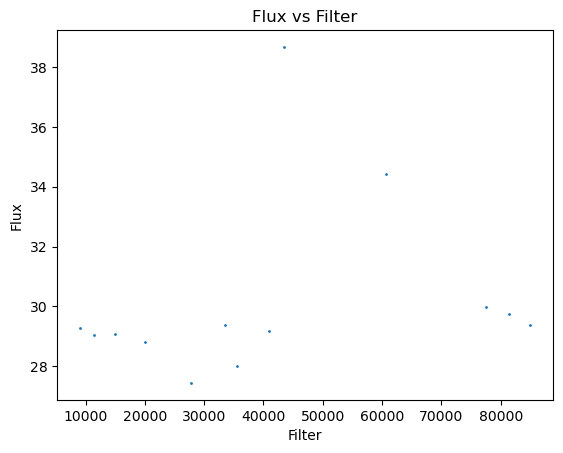

12.532


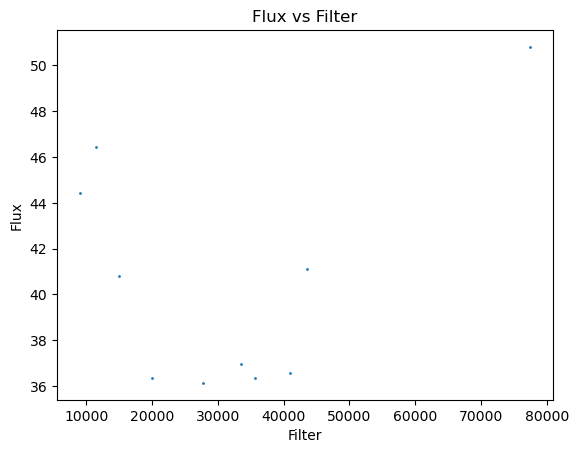

5.03118


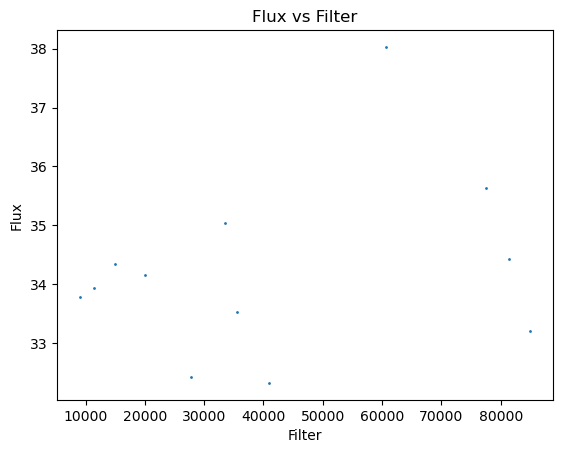

In [36]:
# plot one row of flux data from data_mod_cat
#plt.figure(dpi=500, figsize=(10, 6))

for i in range(100):
    if data_mod_cat.iloc[i, 2] > 4.:
        print(data_mod_cat.iloc[i, 2])
        mag = (-2.5*np.log(data_mod_cat.iloc[i, 11:24].values.astype(float)))+23.9
        plt.scatter(Fil_vals, mag, label='Flux', s=1)
        #plt.errorbar(Fil_vals, mag, yerr=data_mod_cat.iloc[i, 24:37], elinewidth=0.5, alpha=0.4, capsize=1, 
        #             linewidth=0, ecolor='black')
        
        plt.xlabel('Filter')
        plt.ylabel('Flux')
        plt.title('Flux vs Filter')
        #plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
        #plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
        plt.show()


In [ ]:
data_mod_cat['mag_f']

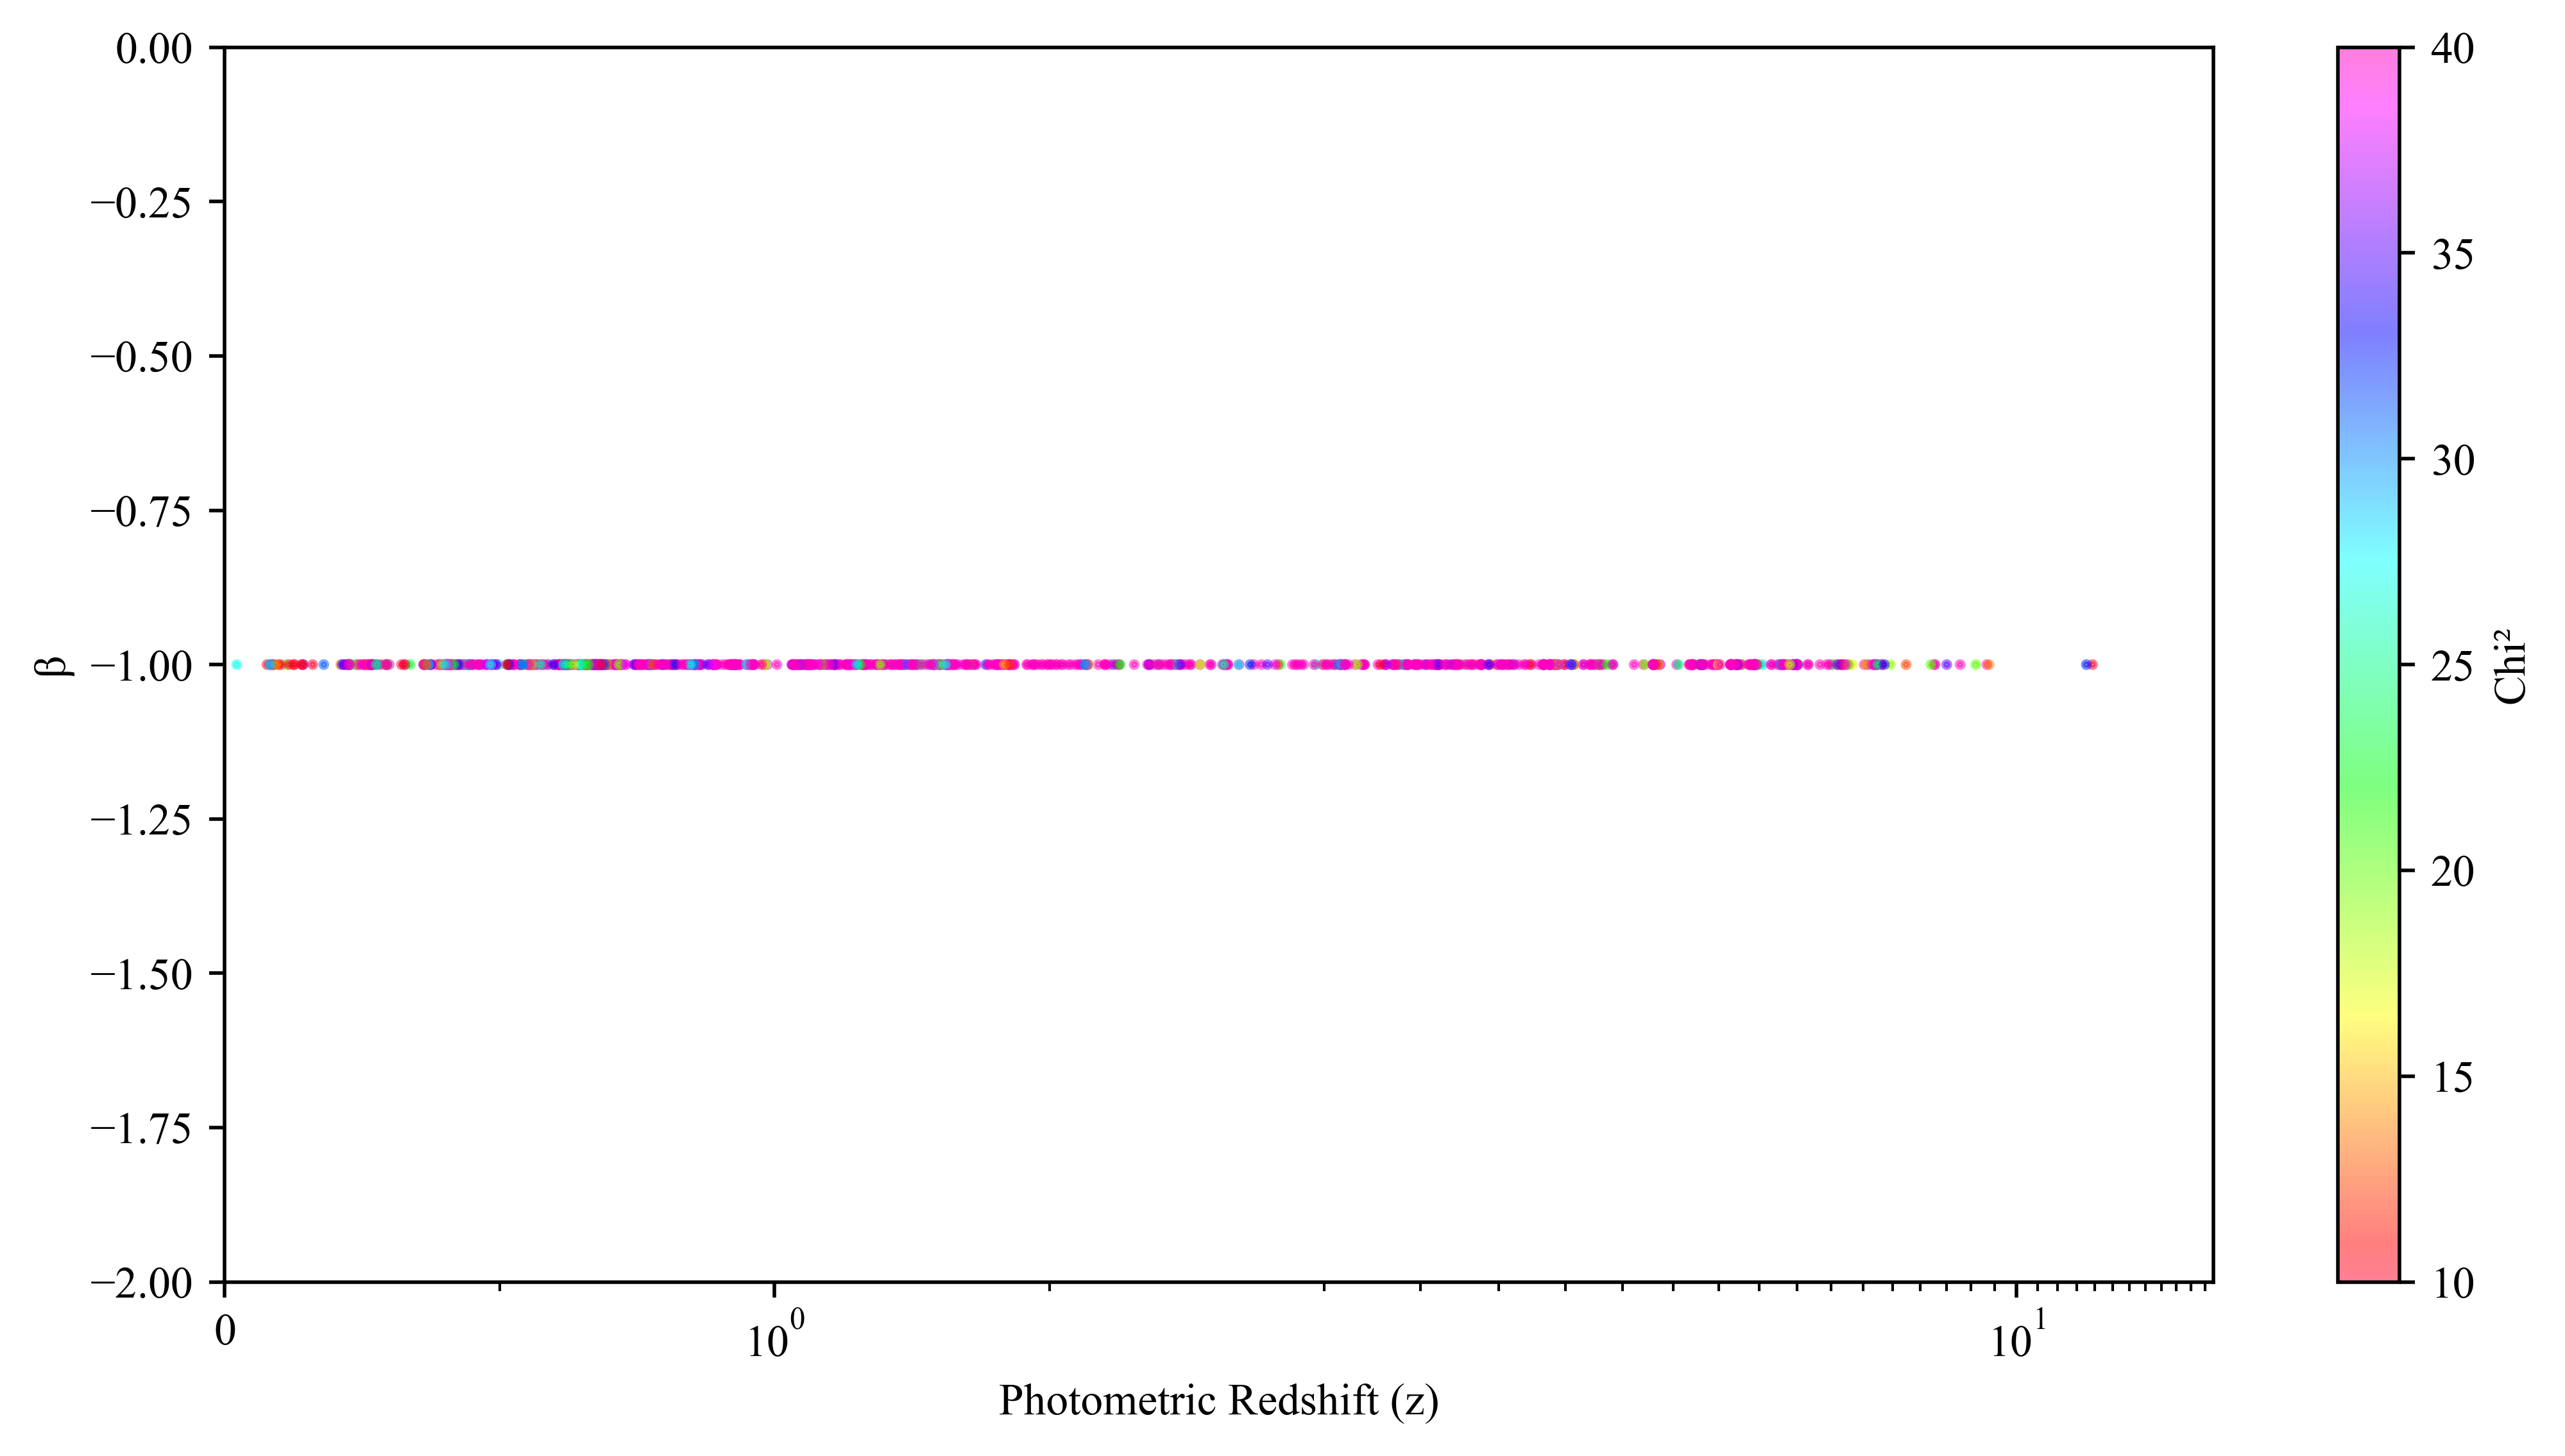

In [78]:
dat = data_cat
beta = (dat['mag_f410m'] - dat['mag_f335m'])/(2.5*np.log10(dat['f335m']/dat['f410m']))-2.0

plt.figure(dpi=500, figsize=(10, 5))
scat = plt.scatter(dat['z_phot'], beta, alpha=0.5, s=2, c=dat['chi2_best'], cmap='gist_rainbow')
plt.xlabel('Photometric Redshift (z)')
plt.ylabel('β')
plt.xscale('symlog')
plt.ylim(-2, 0)
plt.xlim(0, )

cbar = plt.colorbar()
cbar.set_label('Chi²')
cbar.set_alpha(0.7)
scat.set_clim(10, 40)

plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(2))

plt.show()